# **Winner Algorithm (XGBoost)**
## Pourya Ayria 
### Udacity Meeting (03/03/2018)

## **OutLine**:

###   - How XGBoost Works
    
###   - Multi CLassification(Iris dataset)

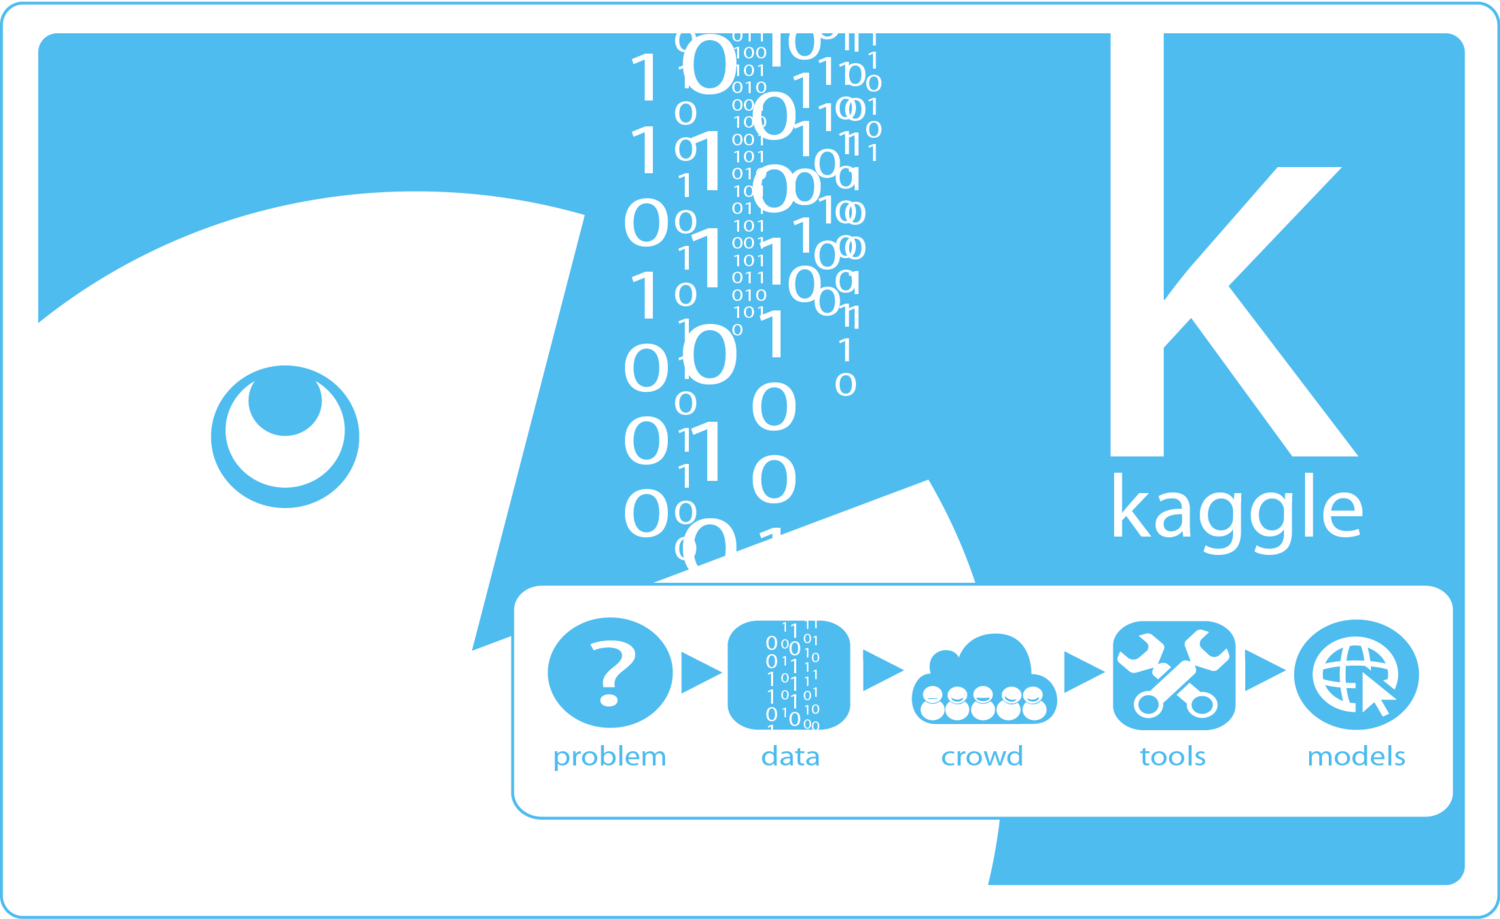

In [1]:
from IPython.display import Image
Image("./img/KaggleWorkshop.png")

### Import Libraries:

In [2]:
import pandas as pd
import numpy as np
# multiclass classification
# from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import randint, uniform

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls



py.init_notebook_mode(connected=True)

# XGBoost (eXtreme Gradient Boosting)

## Residual Based Boosting

In [3]:
size= 6
dic = {'y': [1,1,1,0,0,1],
       'x0' : np.random.rand(size),
       'x1' : np.random.rand(size),
       'x2' : np.random.rand(size),
       'x3' : np.random.rand(size),
      }
Data = pd.DataFrame(dic)
Data

,x0,x1,x2,x3,y
0,0.789231,0.289577,0.177296,0.895891,1
1,0.803816,0.321324,0.674045,0.053632,1
2,0.112633,0.011154,0.818784,0.954577,1
3,0.088158,0.159372,0.859453,0.556333,0
4,0.918012,0.025621,0.639783,0.498176,0
5,0.385018,0.719964,0.478628,0.333644,1


In [4]:
dic1 = {'pred' : [0.80, 0.75,0.65,0.40,0.55,0.34]}
data1 = pd.DataFrame(dic1)
Data = Data.join(data1)
Data

,x0,x1,x2,x3,y,pred
0,0.789231,0.289577,0.177296,0.895891,1,0.80
1,0.803816,0.321324,0.674045,0.053632,1,0.75
2,0.112633,0.011154,0.818784,0.954577,1,0.65
3,0.088158,0.159372,0.859453,0.556333,0,0.40
4,0.918012,0.025621,0.639783,0.498176,0,0.55
5,0.385018,0.719964,0.478628,0.333644,1,0.34


In [5]:
dic2 = {'error' : [0.20, 0.25,0.35,-0.40,-0.55,0.66]}
data2 = pd.DataFrame(dic2)
Data = Data.join(data2)
Data

,x0,x1,x2,x3,y,pred,error
0,0.789231,0.289577,0.177296,0.895891,1,0.80,0.20
1,0.803816,0.321324,0.674045,0.053632,1,0.75,0.25
2,0.112633,0.011154,0.818784,0.954577,1,0.65,0.35
3,0.088158,0.159372,0.859453,0.556333,0,0.40,-0.40
4,0.918012,0.025621,0.639783,0.498176,0,0.55,-0.55
5,0.385018,0.719964,0.478628,0.333644,1,0.34,0.66


** error = y - pred: error = 1- 0.75 = 0.25 **

** now consider error as y (new Target)**

In [6]:
Data = Data[['x0','x1','x2','x3']]
dic2 = {'y' : [0.20, 0.25,0.35,-0.40,-0.55,0.66]}
data2 = pd.DataFrame(dic2)
Data = Data.join(data2)
Data

,x0,x1,x2,x3,y
0,0.789231,0.289577,0.177296,0.895891,0.20
1,0.803816,0.321324,0.674045,0.053632,0.25
2,0.112633,0.011154,0.818784,0.954577,0.35
3,0.088158,0.159372,0.859453,0.556333,-0.40
4,0.918012,0.025621,0.639783,0.498176,-0.55
5,0.385018,0.719964,0.478628,0.333644,0.66


In [7]:
dic3 = {'new_pred' : [0.15, 0.2,0.40,-0.30,-0.20,0.24]}
data3 = pd.DataFrame(dic3)
Data = Data.join(data3)
dic1 = {'old_pred' : [0.80, 0.75,0.65,0.40,0.55,0.34]}
data1 = pd.DataFrame(dic1)
Data = Data.join(data1)
Data

,x0,x1,x2,x3,y,new_pred,old_pred
0,0.789231,0.289577,0.177296,0.895891,0.20,0.15,0.80
1,0.803816,0.321324,0.674045,0.053632,0.25,0.20,0.75
2,0.112633,0.011154,0.818784,0.954577,0.35,0.40,0.65
3,0.088158,0.159372,0.859453,0.556333,-0.40,-0.30,0.40
4,0.918012,0.025621,0.639783,0.498176,-0.55,-0.20,0.55
5,0.385018,0.719964,0.478628,0.333644,0.66,0.24,0.34


In [8]:
dic = {'y': [1,1,1,0,0,1]}
pd.DataFrame(dic)

,y
0,1
1,1
2,1
3,0
4,0
5,1


** To predict Rownum = 1: y = 1  **

** Final prediction = 0.75 + 0.20 = 0.95 **

### So It was a Big Picture of XGBoost

# Multiclass Classification
### Learn About Data:
### Iris dataset
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

Data : https://archive.ics.uci.edu/ml/datasets/iris

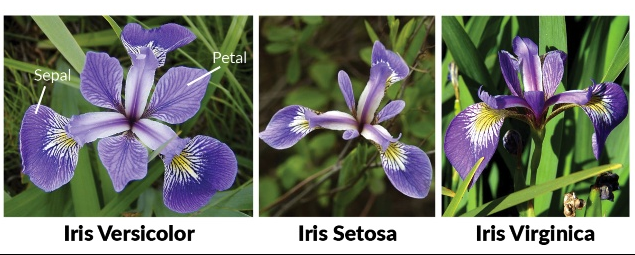

In [9]:
## picture
Image("./img/drawing.png")

1. Problem Definition

2. Load the Dataset

3. Analyze Data

    3.1. Descriptive Statistics
    
    3.2. Data Prepration: Reduce the size of data, Label Encoding
    
    3.3. Data Visualization
    
    3.4. Checking Target Distribution 

4. Modeling
    
    4.1. Feature Importance
    
    4.2. Kfold Cross Validation
    
    4.3. XGBoost vs. Logistic Regression 
    
    4.4 Tuning: GridSearchCV, RandomizedSearchCV
    
    4.5 Prediction 
    
5. Saving the Model
    

# 2. Loading Data

In [10]:
AttributeInformation = ['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'class']
df = pd.read_csv('./data/iris.csv',names=AttributeInformation)

# 3. Analyze Data
## 3.1. Descriptive Statistics

In [11]:
print('Number of rows: ',df.shape[0], ', Number of columns:s ', df.shape[1])

Number of rows:  150 , Number of columns:s  5


In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


** Two Types of data **

1) Numrical data : features

2) Categorical data : class , our target 

In [ ]:
df.describe()

In [ ]:
# do not run the next line 

In [14]:
# fa = Exploration(df)
# feature_inofrmation = fa.DescribeAnalysis(True)

These columns are object 
 ['class']



,Features,Dtype,Nunique,nduplicate,freq1,freq1_val,freq2,freq2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
0,sepal_length,float64,35,115,5.0,10,6.3,9,5.1,9,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
1,sepal_width,float64,23,127,3.0,26,2.8,14,3.2,13,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
2,petal_length,float64,43,107,1.5,14,1.4,12,5.1,8,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
3,petal width,float64,22,128,0.2,28,1.3,13,1.5,12,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## 3.2. Data Prepration

### Reduce the size of data

In [15]:
print('Memory usage is: {}kB'.format(df.memory_usage(index=True).sum()/1000))

Memory usage is: 6.08kB


In [16]:
def ChaneTypeOfCol(df,df_col,typeOfColumn):
    df[df_col] = df[df_col].astype(typeOfColumn)
    return df

In [17]:
names = df.columns[:-1]
for name in names:
    df = ChaneTypeOfCol(df,name,'float32')

print('Memory usage is: {}kB'.format(df.memory_usage(index=True).sum()/1000))

Memory usage is: 3.68kB


### Label Encoding for class(Target):

In [18]:
# Import required packages
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

class CategoricalDataProcessing(object):
    """
    Often, machine learning methods (e.g. logistic regression, SVM with a linear kernel, etc) 
    will require that categorical variables be converted into 
    dummy variables (also called OneHot encoding).
    
    OneHotEncodig and Dummy are the same:
    One-Hot encoding allows us to turn nominal categorical data into
    features with numerical values, while not mathematically imply any 
    ordinal relationship between the classes. 
    
    Input: (df, featureName, action, scaleMAp)
        action : 'dummy','labelEncoding','oridinalToCat'
    
    OutPut:
        datafarme
        
    main method:
        'GetDummies()',

        'GetLabelEncoding()',

        'GetEncodingOrdinalCategorical()'
        
        NewDataFrame():
            return new dataframe include the proces and orginal target
        
        NewDataFrameDrop():
            return new dataframe include the proces and drop target
        
    """
    def __init__(self, dataframe,featureName, action, scaleMap=False):
        self.dataframe = dataframe
        self.featureName = featureName
        self.action = action
        if scaleMap:
            self.scaleMap = scaleMap
        
   
    #
    # Processing Methods
    #

    def __GetDummies(self):
        """
            return dummies categorical variables
        """
        tem_df = self.dataframe[self.featureName]
        df_dummies = pd.get_dummies(tem_df)
        return df_dummies
            
    def __GetLabelEncoding(self):
        """
        """
        tem_df = self.dataframe[self.featureName]
        # Create a label (category) encoder object
        le = preprocessing.LabelEncoder()
        le.fit(self.dataframe[self.featureName])
        
        encoded = le.transform(self.dataframe[self.featureName])
        
        new_df = pd.DataFrame(encoded , columns=[self.featureName + '_labelEncoded']) 
#         print(new_df[featureName + '_labelEncoded'].unique())

        value = new_df[self.featureName + '_labelEncoded'].unique()
        key = le.inverse_transform(value)
        key = key.tolist()
        TransformIntegersIntoCategories = dict(zip(key,value))
        
        # Convert some integers into their category names
        print('Label Encoding transformation:\n',
              TransformIntegersIntoCategories, '\n')

        
        return new_df
    
    def __GetEncodingOrdinalCategorical(self):
        """
        input 
            scaleMap: dictionary, mapper 
                scale_mapper = {'Low':1, 
                        'Medium':2,
                        'High':3}
        """
        tem_df = self.dataframe[[self.featureName]]
        tem_df = tem_df.replace({self.featureName: self.scaleMap})
        tem_df = tem_df.rename(columns={self.featureName:self.featureName+'_scaled'})
        return tem_df
        
    #
    # Action
    #
    def NewDataFrame(self):
        """
            listOfProcess = [cat.GetDummies(nameOfFeature),
                            GetLabelEncoding(nameOfFeature)]
        """
        # set new_df
        if self.action == 'dummy':
            new_df = self.dataframe
            dummyEncoded = self.__GetDummies()
            new_df = new_df.join(dummyEncoded)
            return new_df
        
        elif (self.action == 'labelEncoding'):
            new_df = self.dataframe
            labelEncoded = self.__GetLabelEncoding()
            new_df = new_df.join(labelEncoded)
            return new_df
        
        elif (self.action == 'oridinalToCat'):
            new_df = self.dataframe
            OrdinalEncoded = self.__GetEncodingOrdinalCategorical(scaleMap)
            new_df = new_df.join(OrdinalEncoded)
            return new_df
        else:
            print('Not')
        
                
    def NewDataFrameDrop(self):
        """
            listOfProcess = [cat.GetDummies(),]
            drop the categorical object
        """
        new_dff = self.NewDataFrame()
        new_dff = new_dff.drop(self.featureName, axis=1)
        
        return new_dff

    
    def PrintListOfMethods(self):
        print('dummy','labelEncoding','oridinalToCat')

In [19]:
cat = CategoricalDataProcessing(df,'class','labelEncoding')
new_df = cat.NewDataFrameDrop()
new_df.head()

Label Encoding transformation:
 {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} 



,sepal_length,sepal_width,petal_length,petal width,class_labelEncoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3.3. Data Visualization

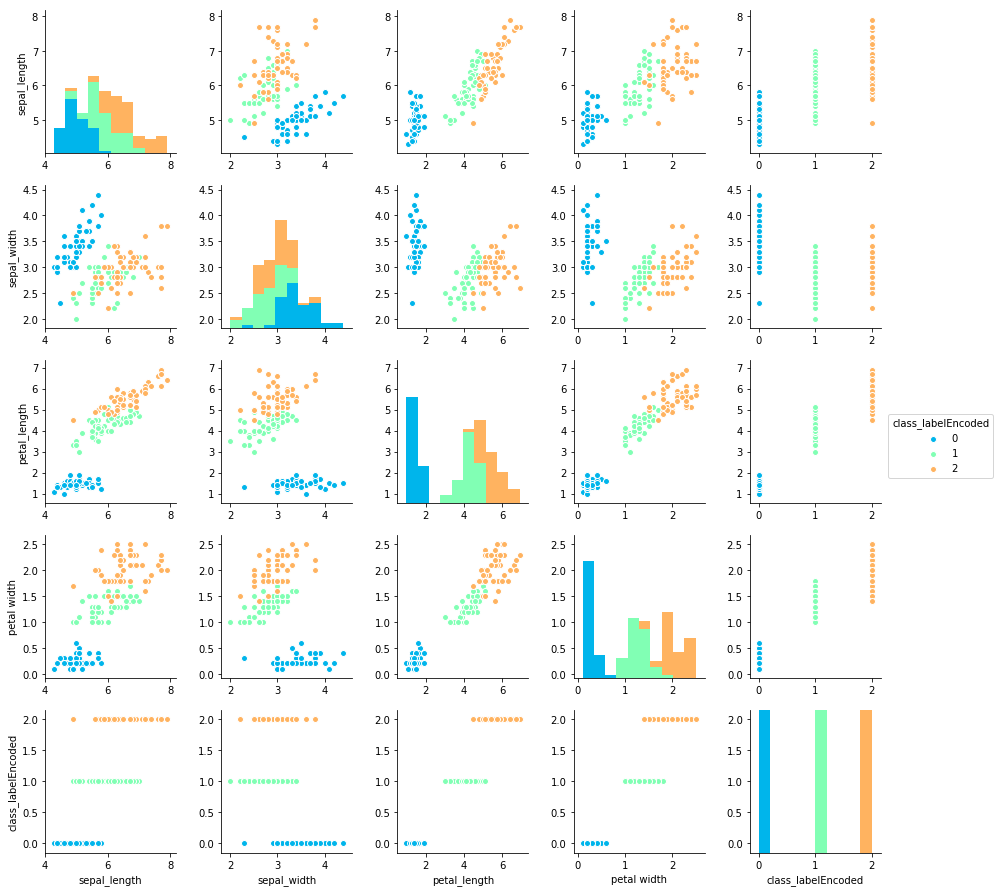

In [20]:
sns.pairplot(new_df,hue='class_labelEncoded',palette='rainbow')

## 3.4. Checking Target Distribution

In [21]:
x = [df['class'].value_counts().index[i] for i in range(df['class'].nunique())]

trace1 = {
  'x': x,
  'y': [df['class'].value_counts().iloc[i] for i in range(df['class'].nunique())],
  'name': 'Trace1',
  'type': 'bar'
};
 
data = [trace1]#, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Target'},
  'yaxis': {'title': 'Count'},
  'barmode': 'relative',
  'title': 'Target Distribution'
};

In [22]:
print('Number of rows: ',df.shape[0], ', Number of columns:s ', df.shape[1])

Number of rows:  150 , Number of columns:s  5


In [23]:
py.iplot({'data': data, 'layout': layout}, filename='Target Distribution')

# 4. Modeling:

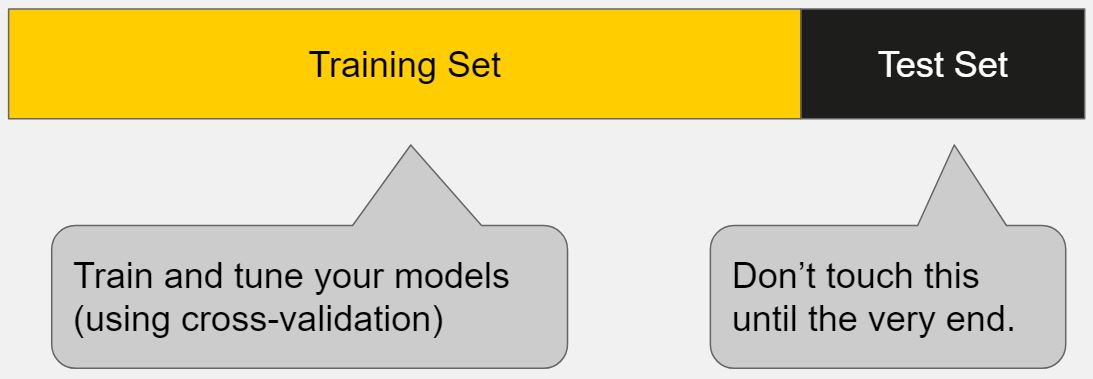

In [24]:
Image("./img/Train-Test-Split-Diagram.jpg")

In [25]:
# split data into X and y
target='class_labelEncoded'
Y = new_df[target]
X = new_df.drop(target, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,)

In [26]:
print('The size of data {}, train {}, test {}.'.format(X.shape,X_train.shape, X_test.shape))

The size of data (150, 4), train (105, 4), test (45, 4).


## 4.1. Feature Importance:

**Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.**

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

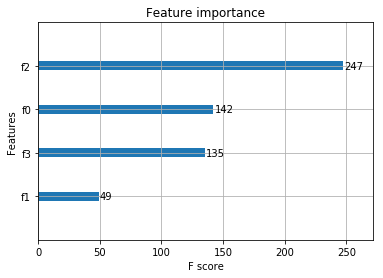

In [28]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

F1 = 2 * (precision * recall) / (precision + recall)

- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

Precision = TP / (TP+FP)

Recall = TP / (TP+FN)

## 4.2. Kfold Cross Validation:
#### Traditional Train Test split
#### Cross Validation

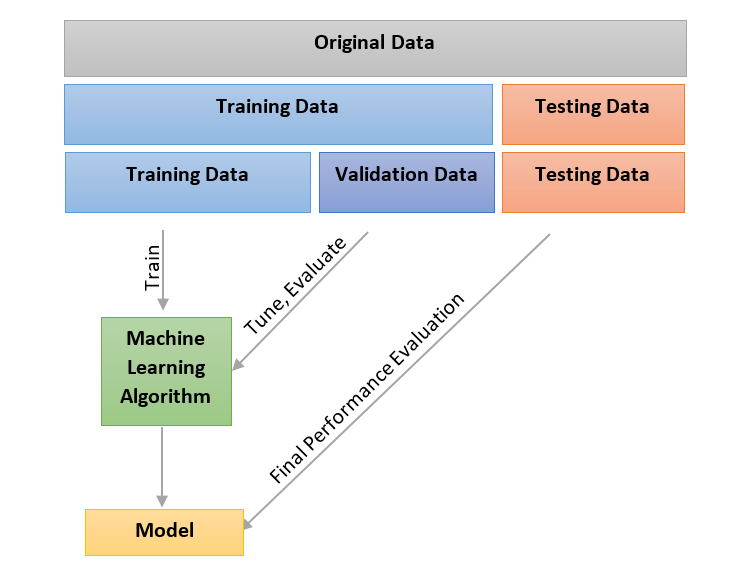

In [29]:
Image("./img/validation.PNG")

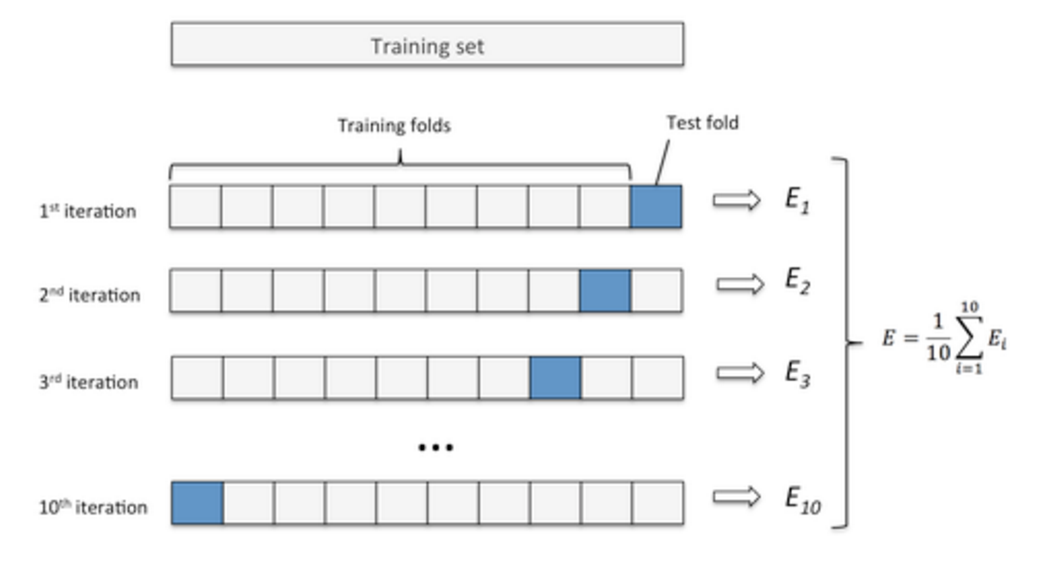

In [30]:
Image("./img/kfold.png")

## 4.3. XGBoost vs. Logistic Regression

In [31]:
def floatingDecimals(f_val, dec):
    prc = "{:."+str(dec)+"f}" #first cast decimal as str
#     print(prc) #str format output is {:.3f}
    return float(prc.format(f_val))

In [32]:
# Spot-Check Algorithms
models = []
models.append(('XGB', XGBClassifier()))
models.append(('LR', LogisticRegression()))
results = []
names = []
seed=1
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} % ({})".format(name, floatingDecimals(cv_results.mean()*100,2), floatingDecimals(cv_results.std()*100,2))
    print(msg)

XGB: 93.18 % (10.0)
LR: 92.36 % (5.89)


Acurracy: is the number of correct predictions made as a ratio of all predictions made

**Make prediction on Test set**

In [33]:
# models.append(('XGB', XGBClassifier()))
name = 'XGB'
kfold = KFold(n_splits=10, random_state=seed)
cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
# results.append(cv_results)
# names.append(name)
msg = "{}: {} ({})".format(name, floatingDecimals(cv_results.mean()*100,2), floatingDecimals(cv_results.std()*100,2))
print(msg)

XGB: 93.5 (10.01)


## 4.4 Tuning: GridSearchCV, RandomizedSearchCV

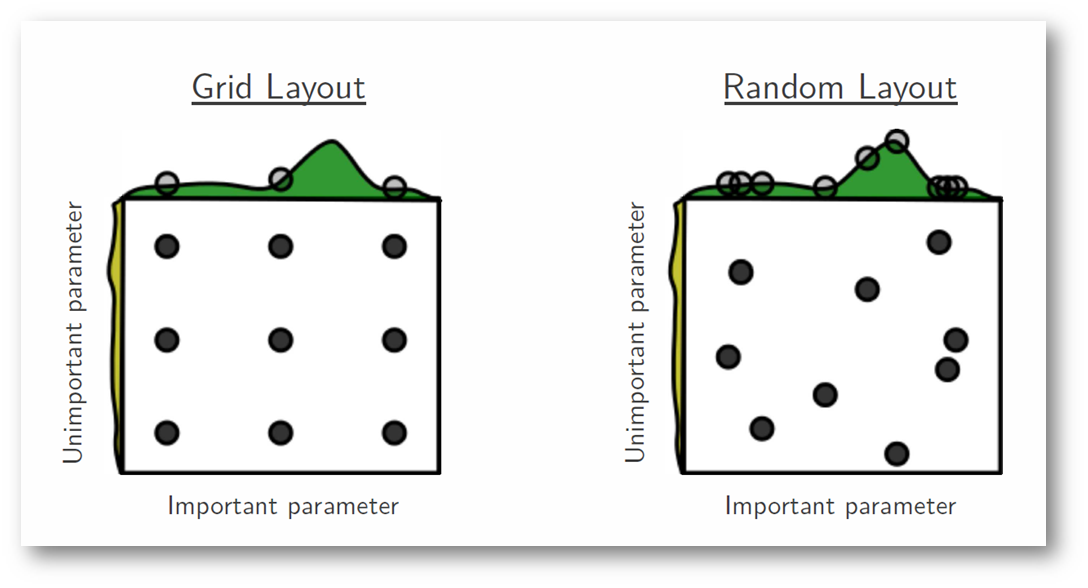

In [34]:
Image("./img/1-ZTlQm_WRcrNqL-nLnx6GJA.png")

### GridSearchCV

n_estimators: Number of Trees

In [35]:
# CV model
model = XGBClassifier()
n_estimators = range(5, 50, 5)
param_grid = {'n_estimators':n_estimators}
# model.fit(X_train, y_train)
kfold = KFold(n_splits=5, random_state=1)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.952381 using {'n_estimators': 10}
0.942857 (0.046657) with: {'n_estimators': 5}
0.952381 (0.052164) with: {'n_estimators': 10}
0.952381 (0.052164) with: {'n_estimators': 15}
0.952381 (0.052164) with: {'n_estimators': 20}
0.942857 (0.055533) with: {'n_estimators': 25}
0.942857 (0.055533) with: {'n_estimators': 30}
0.942857 (0.055533) with: {'n_estimators': 35}
0.942857 (0.055533) with: {'n_estimators': 40}
0.942857 (0.055533) with: {'n_estimators': 45}


### RandomizedSearchCV

In [36]:
a_Parameters = ['scale_pos_weight',
              'num_round',
              'max_leaves',
              'eta',
              'max_depth',
              'subsample',
              'colsample_bylevel',
              'colsample_bytree',
              'max_delta_step',
              'gamma', 
              'booster',
              'alpha',
              'lambda',
             "min_child_weight",
             ]
Explanation = ['used for imbalanced classes(double)',
              'Number of estimators(trees) to build (int)',
              'Maximum leaves in a tree (int).',
              "Penalty applied to each estimator. Needs to be between 0 and 1 (double).",
              "Maximum depth of the tree (int).",
              "Proportion of observations to consider (double)",
              "Proportion of columns (features) to consider in each level (double).",
              "Proportion of columns (features) to consider in each Tree (double)",
              "controls optimization step (double).",
              "controls minimum change requirements in loss to allow for a split (double).",
              "'gbtree' or 'gblinear'.",
              "controls overfitting (double).",
              "controls overfitting (double).",
               "If we increase it, the model will become more conservative. If we set it to 0,\
               which is the minimum value for this parameter, the model will be less constrained. ",
              ]

Important = ["-",
            "Important",
            "-",
            "Important",
            "Important",
            "Important",
            "-",
            "Important",
            "-",
            "-",
            "-",
            "-",
            "-",
            "Important"]

Trend = ["Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing UnderFiting->OverFiting",
         "Increasing OverFiting-> UnderFiting",
         "Increasing OverFiting-> UnderFiting",
         "Increasing OverFiting-> UnderFiting"
        ]

XGBoostDic = {'0Parameters' : a_Parameters,
             'Explanation':Explanation,
             'Important':Important,
             'Trend':Trend}
XGBoost_df = pd.DataFrame(XGBoostDic)
XGBoost_df

,0Parameters,Explanation,Important,Trend
0,scale_pos_weight,used for imbalanced classes(double),-,Increasing UnderFiting->OverFiting
1,num_round,Number of estimators(trees) to build (int),Important,Increasing UnderFiting->OverFiting
2,max_leaves,Maximum leaves in a tree (int).,-,Increasing UnderFiting->OverFiting
3,eta,Penalty applied to each estimator. Needs to be...,Important,Increasing UnderFiting->OverFiting
4,max_depth,Maximum depth of the tree (int).,Important,Increasing UnderFiting->OverFiting
5,subsample,Proportion of observations to consider (double),Important,Increasing UnderFiting->OverFiting
6,colsample_bylevel,Proportion of columns (features) to consider i...,-,Increasing UnderFiting->OverFiting
7,colsample_bytree,Proportion of columns (features) to consider i...,Important,Increasing UnderFiting->OverFiting
8,max_delta_step,controls optimization step (double).,-,Increasing UnderFiting->OverFiting
9,gamma,controls minimum change requirements in loss t...,-,Increasing UnderFiting->OverFiting


In [37]:
cv = KFold(n_splits=5, random_state=1)

In [38]:
params_fixed = {
    'objective': 'multi:softprob',
    'silent': 1
}
params_dist_grid = {
    'max_depth': [1, 2, 3, 4],
    'gamma': [0, 0.5, 1],
    'n_estimators': randint(1, 1001), # uniform discrete random distribution
    'learning_rate': uniform(), # gaussian distribution
    'subsample': uniform(), # gaussian distribution
    'colsample_bytree': uniform() # gaussian distribution
}

In [39]:
rs_grid = RandomizedSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_distributions=params_dist_grid,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=seed
)
rs_grid.fit(X_train, y_train)
print("Best: %f using %s" % (rs_grid.best_score_, rs_grid.best_params_))

Best: 0.961905 using {'colsample_bytree': 0.53881673400335695, 'gamma': 1, 'learning_rate': 0.31327351693227512, 'max_depth': 1, 'n_estimators': 908, 'subsample': 0.44345289377955666}


## 4.5. Prediction

In [40]:
params_fixed = {'objective': 'multi:softprob',
                'silent': 1,
                'colsample_bytree': 0.53881673400335695,
                'gamma': 1,
                'learning_rate': 0.31327351693227512,
                'max_depth': 1, 'n_estimators': 908,
                'subsample': 0.44345289377955666}

In [41]:
model = XGBClassifier(**params_fixed, seed=1)
# models.append(('XGB', XGBClassifier(**params_fixed, seed=1)))
kfold = KFold(n_splits=10, random_state=seed)
cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % ('XGB', cv_results.mean(), cv_results.std())
print(msg)

XGB: 0.955000 (0.090692)


# 5. Saving the Model

In [42]:
import pickle

In [43]:
pickle.dump(model, open("iris.pickle.dat","wb"))
print("Save Model to iris.pickle.dat")

Save Model to iris.pickle.dat


# Thank you!